In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from loaddata import *

mean signal and noise ratio 0.0014018151958561688


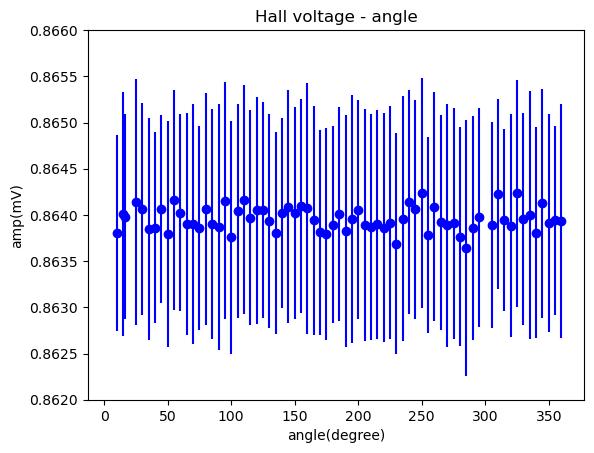

In [64]:
Pt_data = DATA('DATA/some_old_data/Pt_1st.csv')
Pt_data.plot_V_theta(ylim=(0.862,0.866))
print('mean signal and noise ratio',np.mean(Pt_data.df['amp_err']/Pt_data.df['amp']))

fitting type: 1st 
 function:[0.00040647]*sin(2*(theta + [0.29536366])+[-0.03585261])


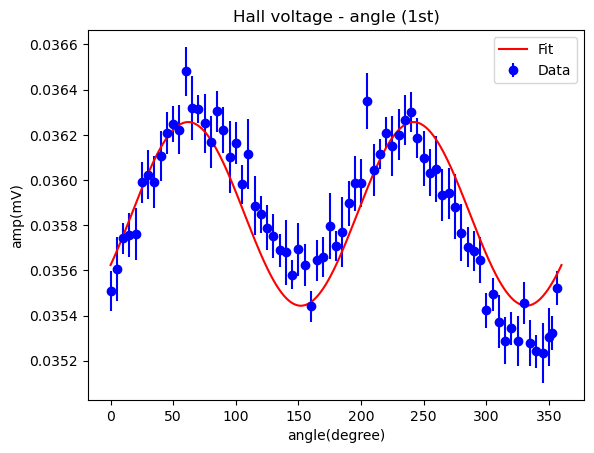

In [48]:
# load data
fn = 'DATA/NiPS3_100nm_1/exp1_953Hz_10mA_1st.csv'
data_1st = DATA(fn)
# fit curve
function_1st = FitData(data_1st)
function_1st.optimize(threshold=1)
print(function_1st)
# plotting
data_1st.plot_V_theta(title=' (1st)',label='Data')
function_1st.plot(label = 'Fit')
plt.legend()

fitting type: 2nd 
 function:[1.0185492e-05]*cos(2*(theta + [0.29536366])*cos(theta + [0.29536366])+[4.3244772e-06])
mse: 5.7715600118087604e-06


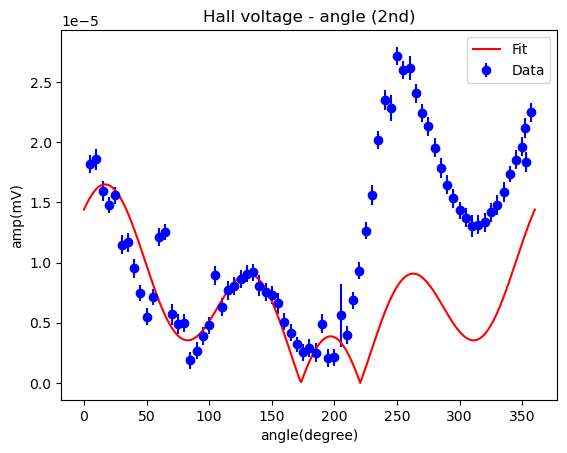

In [49]:
# load data
fn = 'DATA/NiPS3_100nm_1/exp8_953Hz_12mA_3T_2nd_detailscan.csv'
data_2nd = DATA(fn,expand=100)
# fit curve
function_2nd = FitData(data_2nd)
function_2nd.model.b = float(function_1st.param[1])
function_2nd.optimize(threshold=1,max_iter=5000,lr=0.01) #larger threshold for stricter and stabler fit 
print(function_2nd)
print('mse:',function_2nd.eval())
#plotting
data_2nd.plot_V_theta(title=' (2nd)',label='Data')
function_2nd.plot(label = 'Fit')
plt.legend()

In [52]:

V_1st = float(function_1st.param[0])
V_2nd = float(function_2nd.param[0])

H_FL = data_2nd.field*(V_2nd/data_2nd.current)/(V_1st/data_1st.current)
Pt_width = 5e-6
Pt_thickness = 100e-9
current_density = 1e-3*data_2nd.current/Pt_thickness/Pt_width*1e-12 # in unit of 10^12 A/m^2
print(f'current density: {current_density*1e12} A/m²')
print(f'Field like SOT effective field: {H_FL:.4f} T')
print(f'Field like SOT effective field per current density: {H_FL/current_density:.4f} T/(10¹²A/m²)')

current density: 24000000000.0 A/m²
Field like SOT effective field: 0.0626 T
Field like SOT effective field per current density: 2.6103 T/(10¹²A/m²)


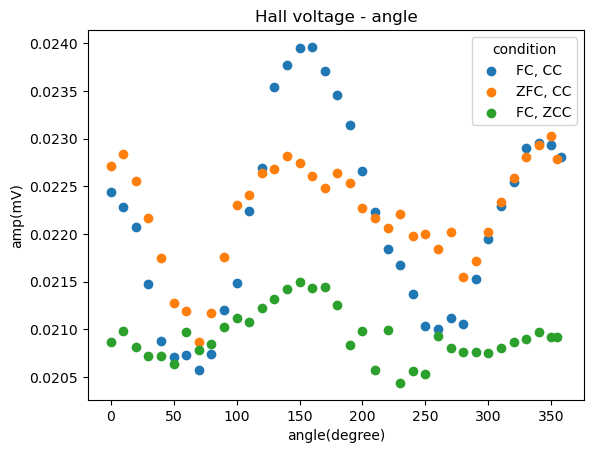

In [2]:
sample_5_2 = DATAS("DATA/NiPS3_100nm_5_2")
sample_5_2.plot_cond(field=3,current=5,temp=20,expID=1)

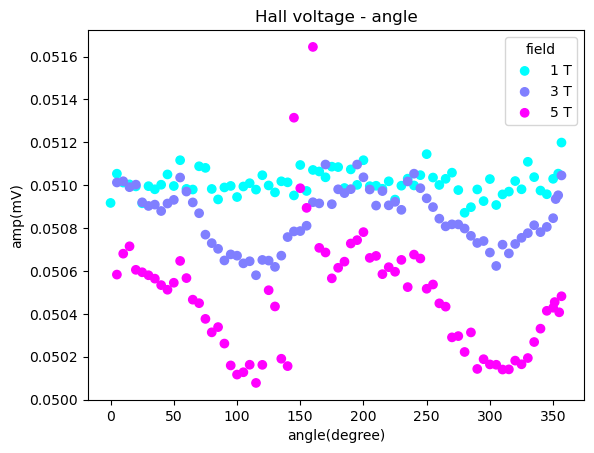

In [3]:
sample_4_1 = DATAS('DATA/NiPS3_100nm_4_1')
sample_4_1.plot_field(temp=20,current=5)

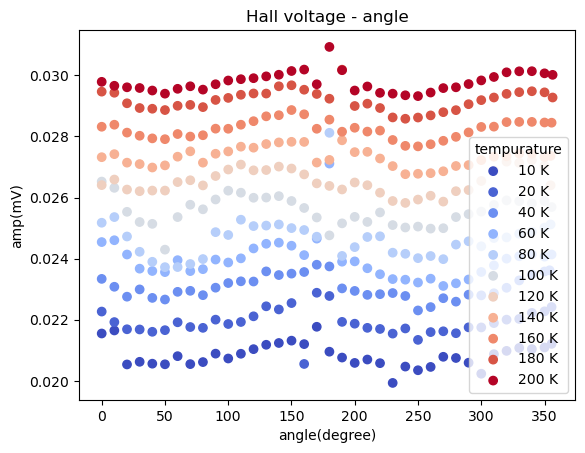

In [4]:
sample_5_2 = DATAS('DATA/NiPS3_100nm_5_2')
sample_5_2.plot_temp(field=3,FC='FC',CC='CC',expID=2)